In [ ]:
# !pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 req

In [ ]:
# assumption of word to web:
# is the meaning of the word changes depending on the other word in the sentence
# for example:

# i am a data scienist, data analyst or data engineer
# There are two types of algorithm in word to web.

# 1. continous bag of words (CBOW)
# 2. skip gram

In [ ]:
# There are some hyperparameters which are very important like window size in CBOW (continous bag of words)

In [ ]:
!pip install keras

In [ ]:
!pip install keras-preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00


In [ ]:
import re
import numpy as np
import pandas as pd
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Dropout, BatchNormalization

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [ ]:
df = pd.read_csv('/content/spam (1).csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df.columns=['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isna().sum()

,0
label,0
text,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='label'>

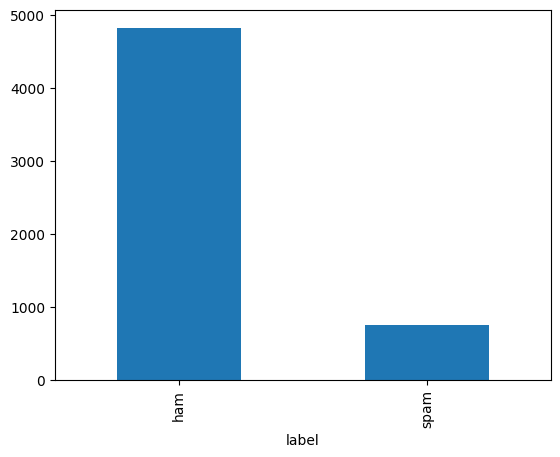

In [ ]:
df['label'].value_counts().plot(kind='bar')  # imbalanced dataset

In [ ]:
def preprocessing_pipeline(text):
  lemmatizer = WordNetLemmatizer()
  if str(type(text)) !="<class 'str'>":
    text = list(text)
    corpus = []
    for i in range(len(text)):
      review = re.sub('[^a-zA-Z]', ' ', text[i])
      review = review.lower()
      review = review.split()
      r = [word for word in review if not word in stopwords.words('english')]
      r = [lemmatizer.lemmatize(word) for word in r]
      r = ' '.join(r)
      corpus.append(r)
    return corpus
  else:
    review = re.sub('[^a-zA-Z]', ' ', text[i])
    review = review.lower()
    review = review.split()
    r = [word for word in review if not word in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    return r

In [ ]:
preprocessed_text = preprocessing_pipeline(df['text'])

In [ ]:
df['label']= np.where(df['label']=='spam', 1, 0)
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
for i in [X_train, X_test, y_train, y_test]:
  print(i.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [ ]:
# feature extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
print(X_train_cv.shape)
print(X_test_cv.shape)

(4457, 7735)
(1115, 7735)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [ ]:
print(X_train_tf.shape)
print(X_test_tf.shape)

(4457, 7735)
(1115, 7735)


gensim is a powerful and effiecient python library for nlp. Its popular for working with large text corpora, word embidding and unsuperwised text analysis. It works well with nltk spacy and sklearn.

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
import logging
sentences = [sentence.split() for sentence in df['text']]
w2v_model = Word2Vec(min_count=5,vector_size=300, workers=4)

In [ ]:
def vectorize(sentence):
  words=sentence.split()
  words_vectors=[w2v_model.wv[word] for word in words if word in w2v_model.wv]
  if len(words_vectors)==0:
    return np.zeros(300)
  word_vecs = np.array(words_vectors)
  return  word_vecs.mean(axis=0)
xtrain_embed = np.array([vectorize(x) for x in X_train])
xtest_embed = np.array([vectorize(x) for x in X_test])
xtrain_embed.shape, xtest_embed.shape

((4457, 300), (1115, 300))

In [ ]:
# import gensim.downloader as api
# model=api.load('word2vec-google-news-300')

In [ ]:
# print(model['man'].shape)
# print(model['man'])
# print(model.most_similar('cricket'))
# print(model.similarity('bat', 'ball'))
# print(model.doesnt_match(["PHP","java",'monkey']))
# vec=model['king']-model['man']+model['woman']
# model.most_similar([vec])

In [ ]:
# from gensim.models import Word2Vec
# from gensim.models import KeyedVectors

# pretrained_model_path = '/content/GoogleNews-vectors-negative300.bin.gz'

# words_vectors = KeyedVectors.load_word2vec_format(pretrained_model_path, binary=True)

# # calculating word similarity
# words_vectors.most_similar('man')

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_cv, y_train)
ypred = lr.predict(X_test_cv)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, ypred))
d=pd.DataFrame(confusion_matrix(y_test, ypred), columns=['ham','spam'], index=['ham', 'spam'])
print(d)
print(classification_report(y_test, ypred))

0.9775784753363229
      ham  spam
ham   964     1
spam   24   126
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
print(X_train_tf.shape)
print(X_test_tf.shape)

(4457, 7735)
(1115, 7735)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_tf, y_train)
ypred = lr.predict(X_test_tf)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, ypred))
d=pd.DataFrame(confusion_matrix(y_test, ypred), columns=['ham','spam'], index=['ham', 'spam'])
print(d)
print(classification_report(y_test, ypred))

0.967713004484305
      ham  spam
ham   964     1
spam   35   115
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
# keyedvector and word2vec

In [ ]:
# xtrain_embed.shape, xtest_embed.shape

In [ ]:
lr = LogisticRegression()
lr.fit(xtrain_embed, y_train)
ypred = lr.predict(xtest_embed)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, ypred))
d=pd.DataFrame(confusion_matrix(y_test, ypred), columns=['ham','spam'], index=['ham', 'spam'])
print(d)
print(classification_report(y_test, ypred))

0.8654708520179372
      ham  spam
ham   965     0
spam  150     0
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
def vectorize(sentence):
  words=sentence.split()
  words_vectors=[w2v_model.wv[word] for word in words if word in w2v_model.wv]
  if len(words_vectors)==0:
    return np.zeros(300)
  word_vecs = np.array(words_vectors)
  return  word_vecs.mean(axis=0)
xtrain_embed = np.array([vectorize(x) for x in X_train])
xtest_embed = np.array([vectorize(x) for x in X_test])
xtrain_embed.shape, xtest_embed.shape

((4457, 300), (1115, 300))

In [ ]:
import gensim.downloader as api
word_vectors=api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
def vectorize(sentence):
  words=sentence.split()
  words_vectors=[word_vectors[word] for word in words if word in word_vectors]
  if len(words_vectors)==0:
    return np.zeros(300)
  word_vecs = np.array(words_vectors)
  return  word_vecs.mean(axis=0)
xtrain_embed_google = np.array([vectorize(x) for x in X_train])
xtest_embed_google = np.array([vectorize(x) for x in X_test])

In [ ]:
lr = LogisticRegression()
lr.fit(xtrain_embed_google, y_train)
ypred = lr.predict(xtest_embed_google)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, ypred))
d=pd.DataFrame(confusion_matrix(y_test, ypred), columns=['ham','spam'], index=['ham', 'spam'])
print(d)
print(classification_report(y_test, ypred))

0.9632286995515695
      ham  spam
ham   956     9
spam   32   118
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       965
           1       0.93      0.79      0.85       150

    accuracy                           0.96      1115
   macro avg       0.95      0.89      0.92      1115
weighted avg       0.96      0.96      0.96      1115



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train_vec=X_train_cv.toarray()
X_test_vec=X_test_cv.toarray()

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(64, activation='relu', input_shape=(X_train_vec.shape[1],)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       495,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497,217 (1.90 MB)

 Trainable params: 497,217 (1.90 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_vec, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8678 - loss: 0.4536 - val_accuracy: 0.9821 - val_loss: 0.0688
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9951 - loss: 0.0298 - val_accuracy: 0.9832 - val_loss: 0.0577
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9998 - loss: 0.0054 - val_accuracy: 0.9843 - val_loss: 0.0673
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9854 - val_loss: 0.0730
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 9.7427e-04 - val_accuracy: 0.9854 - val_loss: 0.0779
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 8.2850e-04 - val_accuracy: 0.9854 - val_loss: 0.0821
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 4.0927e-04 - val_accuracy: 0.9854 - val_loss: 0.0837
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.1137e-04 -

In [ ]:
y_pred_prob = model.predict(X_test_vec)
y_pred = (y_pred_prob > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[965   0]
 [ 22 128]]
0.9802690582959641
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
# keras embadding

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_size=len(tokenizer.word_index)+1
print(vocab_size)

7955


tokenizer.word_index is a dictionary that maps each unique word to an integer

In [ ]:
max_length = 100
X_train_seq = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_seq = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [ ]:
X_train_seq.shape, X_test_seq.shape

((4457, 100), (1115, 100))

In [ ]:
# 28-06